In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

## Load Important Function

In [3]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [4]:
def omega2cistrans(omega):
    """Converts a sequence of float omega angles (in degrees) to an array of ints: 0 cis and 1 trans."""
    
    shifted_omega = (omega + 90.0) % 360.0 - 90.0 # shift into (-90, 270) range to avoid periodic boundaries
    
    cistrans = np.where(shifted_omega > 90.0, 1, 0).astype(int)
    return cistrans

## The Trans Population overtime Plot

In [5]:
omega_state0 = np.array(Data.load(f'omega_data/omegas_state0.pkl').array_list)

In [6]:
ntraj = len(omega_state0)
print('np.array(omega_state0).shape', np.array(omega_state0).shape)

cistrans = omega2cistrans(omega_state0)
print('cistrans.shape', cistrans.shape)

cistrans

np.array(omega_state0).shape (600030, 3)
cistrans.shape (600030, 3)


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [7]:
trans_population = np.zeros((600030, 3))
n_res = cistrans.shape[1]  # Number of residues

for res_idx in range(n_res):
    trans_count = 0
    for j, i in enumerate(cistrans[:, res_idx]):
        if i == 1:  # Trans state
            trans_count += 1
        trans_population[j, res_idx] = trans_count / (j + 1)  # Normalize by total count so far

print('Trans population over all counts:', trans_population)
print('Shape:', np.shape(trans_population))

Trans population over all counts: [[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 ...
 [0.71145013 0.45296719 0.57514816]
 [0.71145061 0.45296644 0.57514887]
 [0.71145109 0.45296735 0.57514958]]
Shape: (600030, 3)


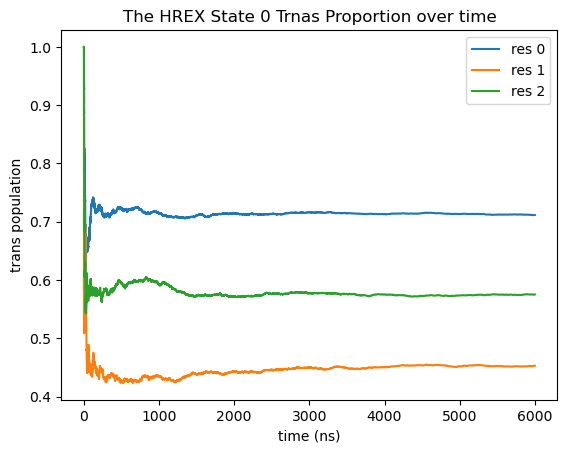

In [9]:
ns_per_step = 0.01
time_in_ns = np.arange(cistrans.shape[0])*ns_per_step

plt.figure()

#plt.plot(time_in_ns, trans_population)
plt.plot(time_in_ns, trans_population[:, 0], label='res 0')
plt.plot(time_in_ns, trans_population[:, 1], label='res 1')
plt.plot(time_in_ns, trans_population[:, 2], label='res 2')


plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.title('The HREX State 0 Trnas Proportion over time')

plt.legend(loc='best')